### Are there internal waves radiating from the bay?

In [2]:
from netCDF4 import Dataset
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
%matplotlib inline
import MITgcmutils as mit
import numpy as np
from scipy import signal
import sys
sys.path.append('/Users/Karina/Research/SVB/notebooks_SVB/')
import svb_tools as svb
import warnings
warnings.filterwarnings('ignore')


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
# Functions
def plot_ssh(nt, vmin=-0.3, vmax=0.3):
    eta = mit.mnc.mnc_files(outdir+'eta.0000000000.t*.nc', layout='exch2')
    W1 = eta.variables['ETAN'][nt,:,:]
    W2 = eta.variables['ETAN'][nt+2,:,:]
    W3 = eta.variables['ETAN'][nt+4,:,:]
    W4 = eta.variables['ETAN'][nt+6,:,:]
    W5 = eta.variables['ETAN'][nt+8,:,:]
    W6 = eta.variables['ETAN'][nt+10,:,:]
    eta.close()

    fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3,figsize=(15,11), sharey=True, sharex=True)
    ax0.set_facecolor('tan')
    ax1.set_facecolor('tan')
    ax2.set_facecolor('tan')
    ax3.set_facecolor('tan')
    ax4.set_facecolor('tan')
    ax5.set_facecolor('tan')

    pc = ax0.pcolormesh(lon,lat, np.ma.masked_array(np.squeeze(W1*100),mask=mask[0,:,:]),
                       cmap=cmo.cm.delta, vmin=vmin, vmax=vmax)
    ax0.contour(lon,lat, np.ma.masked_array(np.squeeze(W1*100),mask=mask[0,:,:]),levels=[0], colors='0.5')
    ax0.contour(lon,lat,depth, levels=[0,250], colors='k')

    pc = ax1.pcolormesh(lon,lat, np.ma.masked_array(np.squeeze(W2*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=vmin, vmax=vmax)
    ax1.contour(lon,lat, np.ma.masked_array(np.squeeze(W2*100),mask=mask[0,:,:]),levels=[0], colors='0.5')
    ax1.contour(lon,lat,depth, levels=[0,250], colors='k')

    pc = ax2.pcolormesh(lon,lat, np.ma.masked_array(np.squeeze(W3*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=vmin, vmax=vmax)
    ax2.contour(lon,lat, np.ma.masked_array(np.squeeze(W3*100),mask=mask[0,:,:]),levels=[0], colors='0.5')
    ax2.contour(lon,lat,depth, levels=[0,250], colors='k')

    pc = ax3.pcolormesh(lon,lat, np.ma.masked_array(np.squeeze(W4*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=vmin, vmax=vmax)
    ax3.contour(lon,lat, np.ma.masked_array(np.squeeze(W4*100),mask=mask[0,:,:]),levels=[0], colors='0.5')
    ax3.contour(lon,lat,depth, levels=[0,250], colors='k')

    pc = ax4.pcolormesh(lon,lat, np.ma.masked_array(np.squeeze(W5*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=vmin, vmax=vmax)
    ax4.contour(lon,lat, np.ma.masked_array(np.squeeze(W5*100),mask=mask[0,:,:]),levels=[0], colors='0.5')
    ax4.contour(lon,lat,depth, levels=[0,250], colors='k')

    pc = ax5.pcolormesh(lon,lat, np.ma.masked_array(np.squeeze(W6*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=vmin, vmax=vmax)
    ax5.contour(lon,lat, np.ma.masked_array(np.squeeze(W6*100),mask=mask[0,:,:]),levels=[0], colors='0.5')
    ax5.contour(lon,lat,depth, levels=[0,250], colors='k')

    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
    cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.delta),
                      cax=cbar_ax, orientation='vertical',label='cm')
    
    for ax in [ax0,ax1,ax2,ax3,ax4,ax5]:
        # ssh transects
        for ii in range(len(lon_inds)):
            ax.plot(lon[lon_inds[ii]],lat[lat_inds[ii]],'ro', markersize=4)

    ax3.set_xlabel('x-ind')
    ax4.set_xlabel('x-ind')
    ax5.set_xlabel('x-ind')
    ax0.set_ylabel('y-ind')
    ax3.set_ylabel('y-ind')

    ax0.set_title(r'$\eta$ at %1.2f h'%(time[nt]/3600))
    ax1.set_title(r'$\eta$ at %1.2f h'%(time[nt+2]/3600))
    ax2.set_title(r'$\eta$ at %1.2f h'%(time[nt+4]/3600))
    ax3.set_title(r'$\eta$ at %1.2f h'%(time[nt+6]/3600))
    ax4.set_title(r'$\eta$ at %1.2f h'%(time[nt+8]/3600))
    ax5.set_title(r'$\eta$ at %1.2f h'%(time[nt+10]/3600))
   
    for ax in [ax0,ax1,ax2,ax3,ax4,ax5]:
        ax.set_aspect(1)
    return(fig,ax0,ax1,ax2,ax3,ax4,ax5)



In [4]:
outdir = '/Volumes/KYUUBI/SVB/05_448x512x100/04_feb_TSref/mnc_test_0001/'

In [33]:
bat = mit.mnc.mnc_files(outdir+'grid.t*.nc', layout='exch2')
depth = bat.variables['Depth'][:]
LAT = bat.variables['Y'][:]
LON = bat.variables['X'][:]
lat = bat.variables['YC'][:,0]
lon = bat.variables['XC'][0,:]-360
Z = bat.variables['Z'][:]
Zl = bat.variables['Zl'][:]
# centers mask
hFacC = bat.variables['HFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)
bat.close()

dyn = mit.mnc.mnc_files(outdir+'dynVars.0000000000.t*.nc', layout='exch2')
Zind = (dyn.variables['diag_levels'][:]).astype(int)
time = dyn.variables['T'][:]
dyn.close()

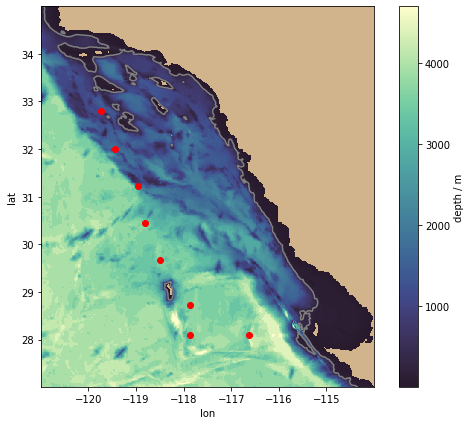

In [34]:
fig, ax = plt.subplots(1,1,figsize=(9,7))
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon,lat,np.ma.masked_array(depth, mask=mask_dep), cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
cn2 = ax.contour(lon,lat,depth, colors='0.5', levels=[250])

lon_ind = 255
lat_ind1 = 70
lat_ind2 = 120
lon_inds = [280,200,200,160,140,130,100,80]
lat_inds = [lat_ind1,lat_ind1, 110, lat_ind2+50,
            lat_ind2+100, lat_ind2+150, lat_ind2+200, lat_ind2+250]
# ssh transects
ax.plot(lon[lon_inds[0]],lat[lat_inds[0]],'ro')
ax.plot(lon[lon_inds[1]],lat[lat_inds[1]],'ro')
ax.plot(lon[lon_inds[2]],lat[lat_inds[2]],'ro')
ax.plot(lon[lon_inds[3]],lat[lat_inds[3]],'ro')
ax.plot(lon[lon_inds[4]],lat[lat_inds[4]],'ro')
ax.plot(lon[lon_inds[5]],lat[lat_inds[5]],'ro')
ax.plot(lon[lon_inds[6]],lat[lat_inds[6]],'ro')
ax.plot(lon[lon_inds[7]],lat[lat_inds[7]],'ro')

cb.set_label('depth / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

ax.set_aspect(1)

### Animations

In [35]:
def plot_field_w(ax,tt,lon,lat,eta,time,mask,zind,cmap=cmo.cm.balance,vmin=-0.6, vmax=0.6):
    ax.set_facecolor('tan')
    pc = ax.pcolormesh(lon,lat, np.ma.masked_array(eta,mask=mask[zind,:,:]),
                       cmap=cmap, vmin=vmin, vmax=vmax)
   # cn = ax.contour(lon,lat,depth, levels=[0, 500], colors=['k','0.5'], alpha=0.8)
      
    if zind>50:
        norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
        cbar_ax = fig.add_axes([0.91, 0.18, 0.02, 0.65]) 
        cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                          cax=cbar_ax, orientation='vertical', 
                          format='%1.2f', label='$w$ ($10^{-5}$ m s$^{-1}$)')
    
    ax.set_title('z=%1.1f m, t=%1.1f h'%(Zl[Zind[zind]],time[tt]/3600))
    ax.set_aspect(1)
    return(ax)

def init():
    tt=12
    dyn = mit.mnc.mnc_files(outdir+'dynVars.0000000000.t*.nc', layout='exch2')
    W1 = dyn.variables['WVEL'][tt,zz,:,:]
    W2 = dyn.variables['WVEL'][tt,zz2,:,:]
    W3 = dyn.variables['WVEL'][tt,zz3,:,:]
    dyn.close()
    axx= plot_field_w(ax1,tt,lon,lat,W1*1E5,time,mask,zz,cmap=cmap, vmin=-1., vmax=1.)
    axxx = plot_field_w(ax2,tt,lon,lat,W2*1E5,time,mask,zz2,cmap=cmap, vmin=-1., vmax=1.)
    axxxx = plot_field_w(ax3,tt,lon,lat,W3*1E5,time,mask,zz3,cmap=cmap,  vmin=-1., vmax=1.)
    ax1.set_xlabel('lon')
    ax1.set_ylabel('lat')
    ax2.set_xlabel('lon')
    ax3.set_xlabel('lon')
    ax2.set_yticks([])
    ax3.set_yticks([])
def animate(t):
    tt=t+12
    print(t)
    dyn = mit.mnc.mnc_files(outdir+'dynVars.0000000000.t*.nc', layout='exch2') 
    W1 = dyn.variables['WVEL'][tt,zz,:,:]
    W2 = dyn.variables['WVEL'][tt,zz2,:,:]
    W3 = dyn.variables['WVEL'][tt,zz3,:,:]
    dyn.close()

    axx= plot_field_w(ax1,tt,lon,lat,W1*1E5,time,mask,zz,cmap=cmap, vmin=-1., vmax=1.)
    axxx = plot_field_w(ax2,tt,lon,lat,W2*1E5,time,mask,zz2,cmap=cmap, vmin=-1., vmax=1.)
    axxxx = plot_field_w(ax3,tt,lon,lat,W3*1E5,time,mask,zz3,cmap=cmap,  vmin=-1., vmax=1.)
    ax1.set_xlabel('lon')
    ax1.set_ylabel('lat')
    ax2.set_xlabel('lon')
    ax3.set_xlabel('lon')
    ax2.set_yticks([])
    ax3.set_yticks([])

In [36]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, metadata=dict(artist='Me'), bitrate=1800)

In [ ]:
cmap=cmo.cm.balance
zz = 20
zz2 = 42
zz3 = 55

fig = plt.figure(figsize=(11,4.8))
gs = GridSpec(1,3, width_ratios=[1,1,1], wspace=0.05)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

    
# Uncomment lines below to run and save animation
anim = animation.FuncAnimation(fig, animate, init_func=init,blit=False, frames=132, repeat=False)
anim.save('w_04_feb_TS.mp4', writer=writer)
  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82


In [6]:
Zind

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 74, 79, 84, 89, 94, 99])

In [27]:
Zl[Zind[55]]

-508.2